This is for the capstone project of IBM's Data Science Certificate.

In [4]:
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [5]:
import urllib.request


I am basing this section on this link https://simpleanalytical.com/how-to-web-scrape-wikipedia-python-urllib-beautiful-soup-pandas as provided by the course. Many things have changed to adapt to this particular usage of the data analysis.

In [6]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [7]:
page = urllib.request.urlopen(url)


This opens the url using urllib.

In [8]:
from bs4 import BeautifulSoup


In [9]:
soup = BeautifulSoup(page, "lxml")


In [10]:
all_tables=soup.find_all("table")

In [11]:
right_table=soup.find('table', class_='wikitable sortable')


In [12]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(str(cells[0].find(text=True))[:-1])
        B.append(str(cells[1].find(text=True))[:-1])
        C.append(str(cells[2].find(text=True))[:-1])

I have included the [:-1] as the original text contains a newline operator (2 characters) at the end of every entry. To account for this I have simply cut off the last two characters of all entries.

In [13]:
import pandas as pd
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [14]:
df.shape

(180, 3)

There are 180 rows.

In [15]:
newdf = pd.read_csv('http://cocl.us/Geospatial_data')

In [21]:
newdf.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
merged_inner = pd.merge(left=newdf, right=df, left_on='Postal Code', right_on='Postal Code')



In [17]:
merged_inner

,Postal Code,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
5,M1J,43.744734,-79.239476,Scarborough,Scarborough Village
6,M1K,43.727929,-79.262029,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,43.711112,-79.284577,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,43.716316,-79.239476,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,43.692657,-79.264848,Scarborough,"Birch Cliff, Cliffside West"


In [18]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [19]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [27]:
toronto_data = merged_inner[merged_inner['Borough'].str.contains('.*Toronto.*')].reset_index(drop=True)
toronto_data

,Postal Code,Latitude,Longitude,Borough,Neighborhood
0,M4E,43.676357,-79.293031,East Toronto,The Beaches
1,M4K,43.679557,-79.352188,East Toronto,"The Danforth West, Riverdale"
2,M4L,43.668999,-79.315572,East Toronto,"India Bazaar, The Beaches West"
3,M4M,43.659526,-79.340923,East Toronto,Studio District
4,M4N,43.728020,-79.388790,Central Toronto,Lawrence Park
5,M4P,43.712751,-79.390197,Central Toronto,Davisville North
6,M4R,43.715383,-79.405678,Central Toronto,"North Toronto West, Lawrence Park"
7,M4S,43.704324,-79.388790,Central Toronto,Davisville
8,M4T,43.689574,-79.383160,Central Toronto,"Moore Park, Summerhill East"
9,M4V,43.686412,-79.400049,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest..."


In [30]:
boroughonehot = pd.get_dummies(toronto_data.Borough, prefix='Borough')
boroughonehot["Postal Code"] = toronto_data["Postal Code"]
boroughonehot["Latitude"] = toronto_data["Latitude"]
boroughonehot["Longitude"] = toronto_data["Longitude"]
boroughonehot.head()

,Borough_Central Toronto,Borough_Downtown Toronto,Borough_East Toronto,Borough_West Toronto,Postal Code,Latitude,Longitude
0,0,0,1,0,M4E,43.676357,-79.293031
1,0,0,1,0,M4K,43.679557,-79.352188
2,0,0,1,0,M4L,43.668999,-79.315572
3,0,0,1,0,M4M,43.659526,-79.340923
4,1,0,0,0,M4N,43.728020,-79.388790


In [31]:
firstcol = boroughonehot.pop("Postal Code")

In [32]:
boroughonehot.insert(0,"Postal Code",firstcol)

In [33]:
boroughonehot

,Postal Code,Borough_Central Toronto,Borough_Downtown Toronto,Borough_East Toronto,Borough_West Toronto,Latitude,Longitude
0,M4E,0,0,1,0,43.676357,-79.293031
1,M4K,0,0,1,0,43.679557,-79.352188
2,M4L,0,0,1,0,43.668999,-79.315572
3,M4M,0,0,1,0,43.659526,-79.340923
4,M4N,1,0,0,0,43.728020,-79.388790
5,M4P,1,0,0,0,43.712751,-79.390197
6,M4R,1,0,0,0,43.715383,-79.405678
7,M4S,1,0,0,0,43.704324,-79.388790
8,M4T,1,0,0,0,43.689574,-79.383160
9,M4V,1,0,0,0,43.686412,-79.400049


In [34]:
new = boroughonehot[['Latitude', 'Longitude']].copy()


In [35]:
new

,Latitude,Longitude
0,43.676357,-79.293031
1,43.679557,-79.352188
2,43.668999,-79.315572
3,43.659526,-79.340923
4,43.728020,-79.388790
5,43.712751,-79.390197
6,43.715383,-79.405678
7,43.704324,-79.388790
8,43.689574,-79.383160
9,43.686412,-79.400049


[[ 43.65506566 -79.44547176]
 [ 43.70197979 -79.39895406]
 [ 43.65717334 -79.3693986 ]]


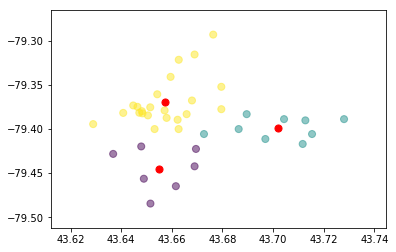

In [41]:
kmeans = KMeans(n_clusters=3).fit(new)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(new['Latitude'], new['Longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [43]:
new.insert(2, 'Cluster Labels', kmeans.labels_)

In [44]:
new

,Latitude,Longitude,Cluster Labels
0,43.676357,-79.293031,2
1,43.679557,-79.352188,2
2,43.668999,-79.315572,2
3,43.659526,-79.340923,2
4,43.728020,-79.388790,1
5,43.712751,-79.390197,1
6,43.715383,-79.405678,1
7,43.704324,-79.388790,1
8,43.689574,-79.383160,1
9,43.686412,-79.400049,1


We see that right now, there are three main neighbourhoods in toronto. I asked: what if there were only 3? How would they be best divided?

In [46]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [48]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [51]:

# create map
map_clusters = folium.Map(location=[43.67, -79.4], zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(new['Latitude'], new['Longitude'], new['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

It seems that with only three clusters, there is a "West Toronto", a "North Toronto", and a "Downtown Toronto." This is very interesting, as East Toronto no longer exists and has merged into Downtown Toronto, and Central Toronto has been split between North Toronto and Downtown Toronto.